# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

import pydotplus
from IPython.display import Image


# Load CSV file

In [2]:
df=pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

# Define X and Y

In [3]:
x=df.iloc[:,:-1].values
y=df.loc[:,'DEATH_EVENT'].values

# Split to train and test

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [5]:
print("***** X-Values *****")
print(x_train)
print("***** It's Shape *****")
print(x_train.shape)
print("*****Y-Values*****")
print(y_train)
print("***** It's Shape *****")
print(y_train.shape)


***** X-Values *****
[[7.000e+01 1.000e+00 1.430e+02 ... 0.000e+00 0.000e+00 9.000e+01]
 [8.700e+01 1.000e+00 1.490e+02 ... 1.000e+00 0.000e+00 1.400e+01]
 [4.500e+01 0.000e+00 7.702e+03 ... 1.000e+00 0.000e+00 6.000e+01]
 ...
 [6.000e+01 0.000e+00 8.970e+02 ... 1.000e+00 0.000e+00 8.000e+01]
 [7.000e+01 0.000e+00 6.900e+01 ... 0.000e+00 0.000e+00 7.500e+01]
 [6.400e+01 1.000e+00 6.200e+01 ... 0.000e+00 0.000e+00 1.740e+02]]
***** It's Shape *****
(239, 12)
*****Y-Values*****
[1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
***** It's Shape *****
(239,)


# Instantiate DecisionTreeClassifier

In [6]:
model=DecisionTreeClassifier()

In [7]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Visualize Graph

# Download Graphviz from link:
    https://graphviz.org/download/

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Graphviz/bin/'

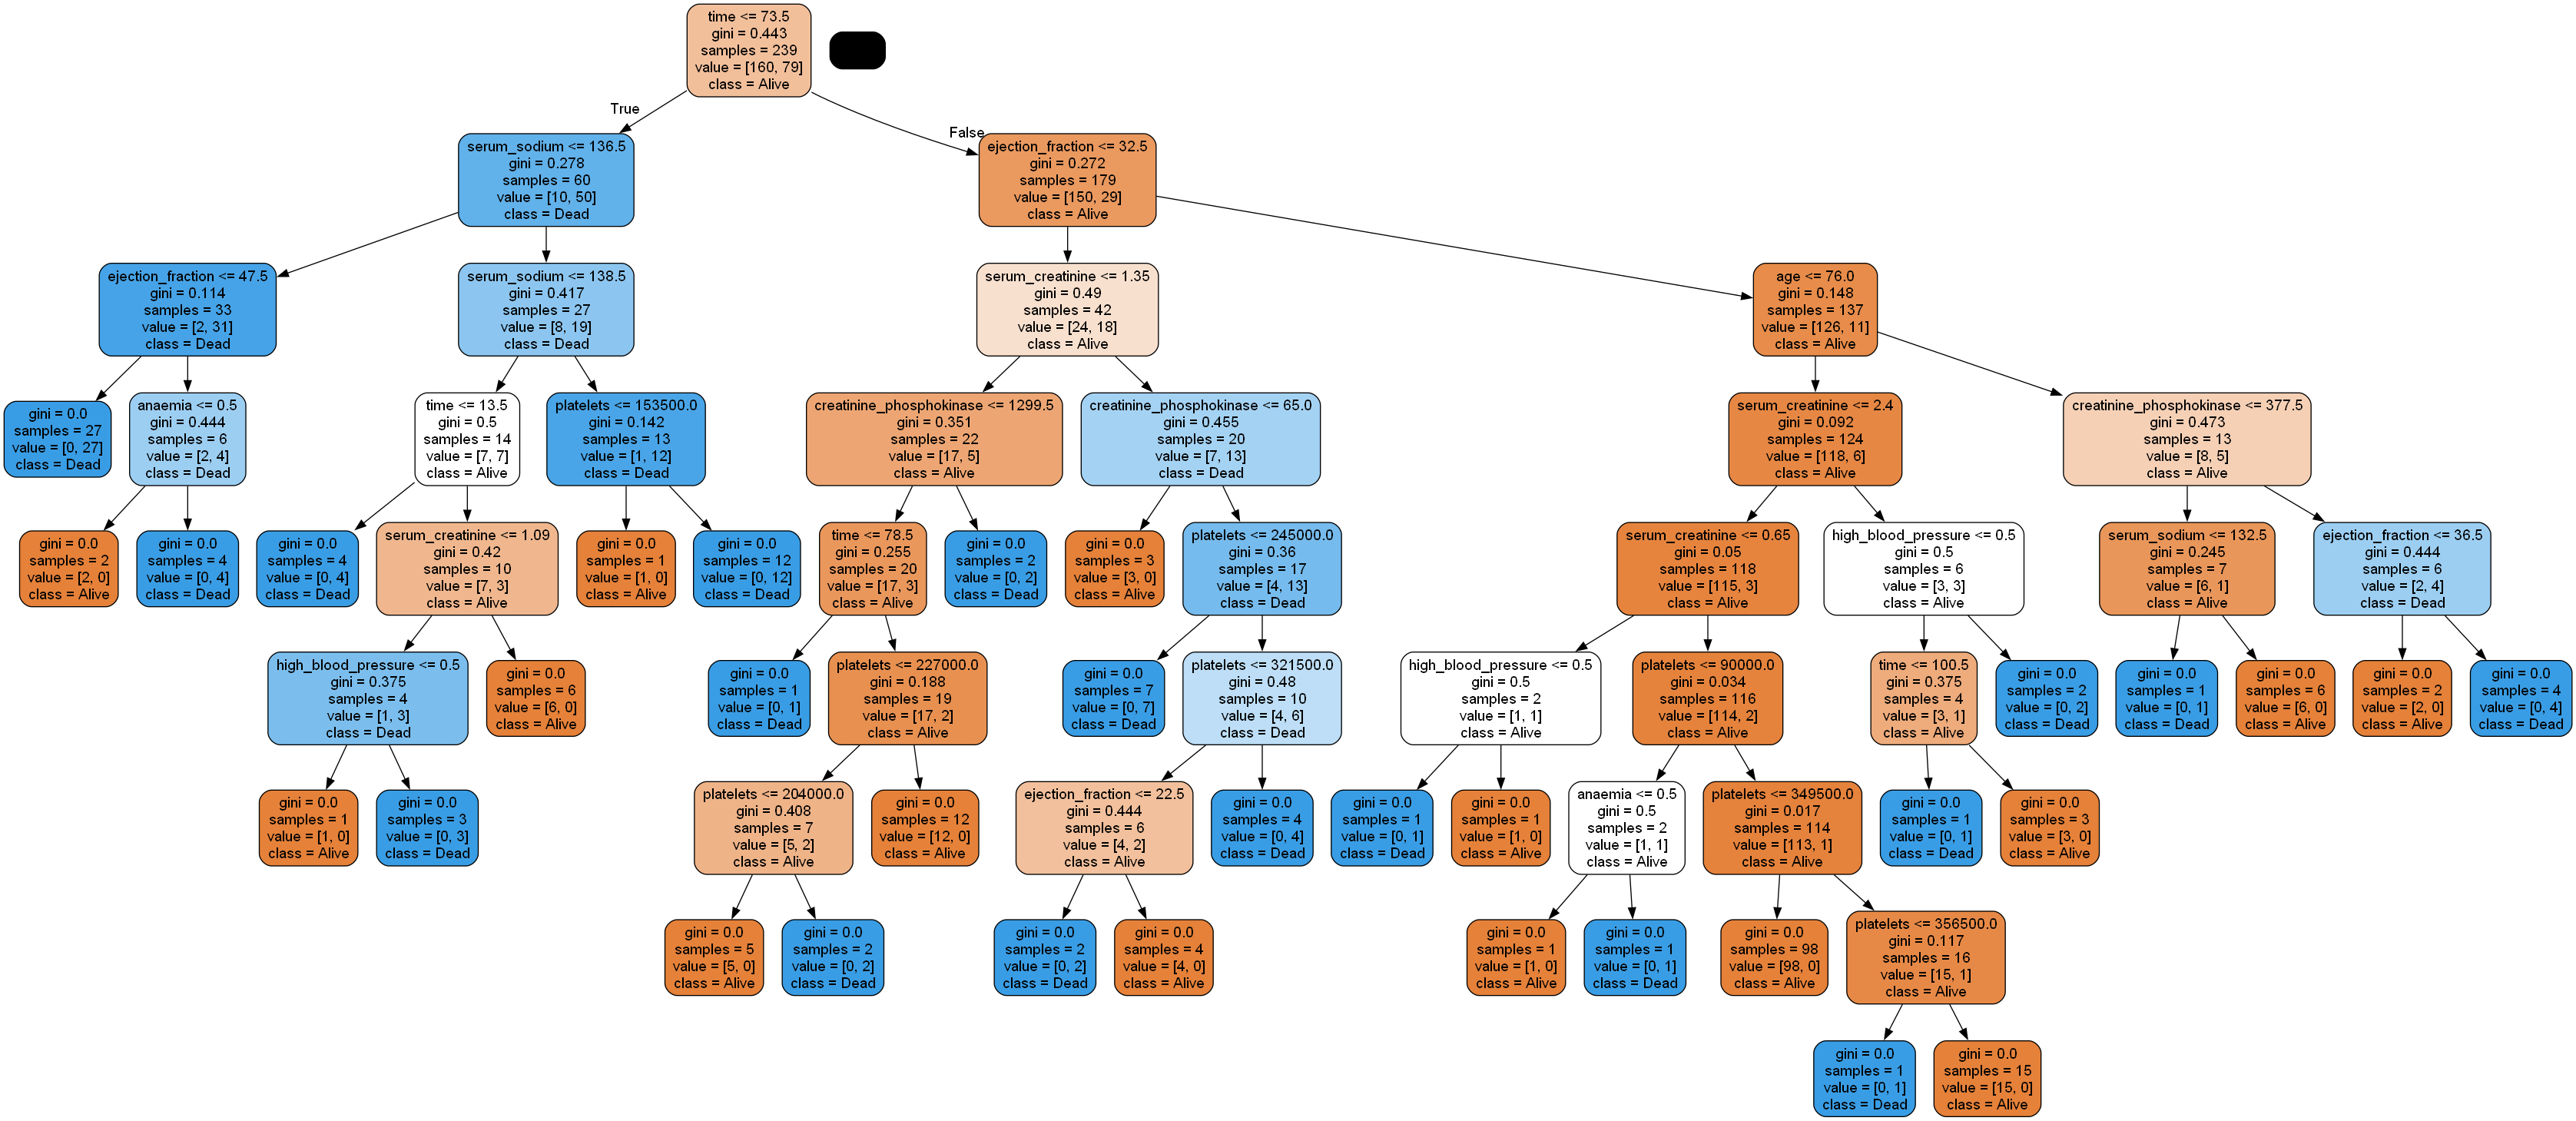

In [11]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names = list(df.columns[:-1].values), class_names=['Alive', 'Dead'], 
                                 rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(data_plot)

Image(graph.create_png())

# Predict on Test Data

In [12]:
y_pred=model.predict(x_test)

# Evaluation Metrics

In [13]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [14]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.8
Recall-Score : 0.6
Precision-Score : 0.8823529411764706
F1-Score : 0.7142857142857143


In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



# Confusion Matrix

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

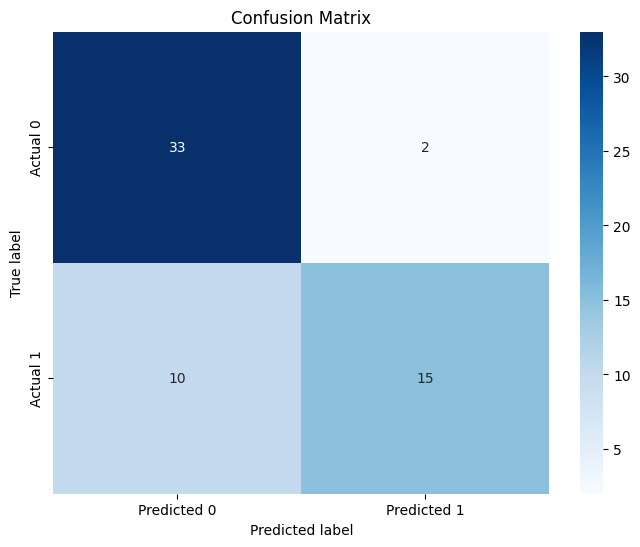

In [17]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()